# Đoán % giảm giá

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = './fashin/Fasion_Clothing.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [6]:
df['category_by_Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [7]:
df.groupby('Category')['category_by_Gender'].unique()

Category
Bottom Wear                        [Men]
Indian Wear                 [Women, Men]
Inner Wear &  Sleep Wear           [Men]
Lingerie & Sleep Wear            [Women]
Plus Size                   [Women, Men]
Sports Wear                 [Men, Women]
Topwear                            [Men]
Western                          [Women]
Name: category_by_Gender, dtype: object

In [8]:
df['Category'].unique()

array(['Bottom Wear', 'Topwear', 'Lingerie & Sleep Wear', 'Western',
       'Sports Wear', 'Indian Wear', 'Plus Size',
       'Inner Wear &  Sleep Wear'], dtype=object)

In [9]:
df.groupby('Individual_category')['Category'].unique()

Individual_category
baby-dolls                              [Lingerie & Sleep Wear]
bath-robe     [Lingerie & Sleep Wear, Inner Wear &  Sleep Wear]
blazers       [Western, Indian Wear, Topwear, Plus Size, Spo...
boots                                               [Plus Size]
boxers        [Inner Wear &  Sleep Wear, Plus Size, Indian W...
                                    ...                        
trousers      [Bottom Wear, Western, Plus Size, Sports Wear,...
trunk         [Inner Wear &  Sleep Wear, Plus Size, Sports W...
tshirts       [Western, Topwear, Sports Wear, Plus Size, Ind...
tunics                                 [Indian Wear, Plus Size]
waistcoat                                [Indian Wear, Western]
Name: Category, Length: 92, dtype: object

In [10]:
df['Individual_category'].unique()

array(['jeans', 'track-pants', 'shirts', 'shapewear', 'tshirts', 'tops',
       'trousers', 'tights', 'kurta-sets', 'jumpsuit', 'kurtas', 'bra',
       'shorts', 'dresses', 'bath-robe', 'jackets', 'socks', 'briefs',
       'sweatshirts', 'sarees', 'trunk', 'kurtis', 'skirts',
       'night-suits', 'lounge-pants', 'palazzos', 'stockings', 'jeggings',
       'leggings', 'shrug', 'boxers', 'dupatta', 'tunics',
       'innerwear-vests', 'sweaters', 'lounge-shorts', 'thermal-tops',
       'capris', 'nightdress', 'pyjamas', 'sports-sandals', 'dungarees',
       'tracksuits', 'camisoles', 'nehru-jackets', 'blazers',
       'thermal-bottoms', 'lounge-tshirts', 'lehenga-choli', 'baby-dolls',
       'coats', 'thermal-set', 'saree-blouse', 'churidar',
       'dress-material', 'boots', 'lingerie-set', 'sherwani', 'co-ords',
       'flats', 'swimwear', 'rain-jacket', 'patiala', 'salwar',
       'harem-pants', 'patiala-and-dupatta', 'lingerie-accessories',
       'saree-accessories', 'suits', 'dhoti

In [11]:
df['BrandName'].unique()

array(['Roadster', 'LOCOMOTIVE', 'Zivame', ..., 'Doodlage', 'CHOZI',
       'STATUS MANTRA'], dtype=object)

### Kiểm tra toàn vẹn, xử lý dữ liệu

In [12]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

In [13]:
df[df['DiscountPrice (in Rs)'].isnull()].head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0
5,https://www.myntra.com/tops/mast--harbour/mast...,2490950,Mast & Harbour,Western,tops,Women,mast harbour women yellow solid tank top,NaN,599.0,40% OFF,"XS, S, M, L, XL",4.4,999.0
7,https://www.myntra.com/tops/mayra/mayra-pink-e...,8439415,Mayra,Western,tops,Women,mayra pink embroidered a line pure cotton top,NaN,1395.0,58% OFF,"S, M, L, XL",3.7,998.0
8,https://www.myntra.com/tshirts/roadster/roadst...,17381394,Roadster,Western,tshirts,Women,roadster women pack of 2 solid t shirts,NaN,1098.0,NaN,"XS, S, M, L, XL",4.3,997.0
9,https://www.myntra.com/jeans/herenow/herenow-m...,2359257,HERE&NOW,Bottom Wear,jeans,Men,herenow men blue slim fit mid rise clean look ...,NaN,2749.0,NaN,"28, 30, 32, 34, 36",3.5,996.0


### Xử lý dữ liệu

In [14]:
df_DPnull = df[df['DiscountPrice (in Rs)'].isnull()]

In [15]:
df_DP = df[df['DiscountPrice (in Rs)'].notnull()]
df_DP.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0


In [16]:
df.shape

(526564, 13)

In [17]:
df_DPnull.shape

(193158, 13)

In [18]:
df_DPnull.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
dtype: object

In [19]:
df_DP.shape

(333406, 13)

#### DiscountOffer fill những giá trị rỗng = 0, chuyển tất cả giá trị của DiscountOffer sang string để xử lý chuỗi

In [20]:
df_DPnull['DiscountOffer'] = df_DPnull['DiscountOffer'].fillna(0)
df_DPnull['DiscountOffer'] = df_DPnull['DiscountOffer'].astype(str)
df_DPnull['DiscountOffer']

4         35% OFF
5         40% OFF
7         58% OFF
8               0
9               0
           ...   
526559          0
526560          0
526561          0
526562          0
526563          0
Name: DiscountOffer, Length: 193158, dtype: object

#### Thử cắt chuỗi

In [21]:
df_DPnull['DiscountOffer'].apply(lambda x: x.split('%'))

4         [35,  OFF]
5         [40,  OFF]
7         [58,  OFF]
8                [0]
9                [0]
             ...    
526559           [0]
526560           [0]
526561           [0]
526562           [0]
526563           [0]
Name: DiscountOffer, Length: 193158, dtype: object

#### Cắt chuỗi và ép kiểu về int

In [22]:
df_DPnull['discount'] = df_DPnull['DiscountOffer'].apply(lambda x: x.split('%')[0])
# df_DPnull['discount'] = df_DPnull['discount'].astype(int)
# lỗi do trong này vẫn có value không thể đưa về int
df_DPnull['discount']

4         35
5         40
7         58
8          0
9          0
          ..
526559     0
526560     0
526561     0
526562     0
526563     0
Name: discount, Length: 193158, dtype: object

#### Kiểm tra độ dài chuỗi trong DiscountOffer

In [23]:
df_DPnull['DiscountOffer_len'] = df_DPnull['DiscountOffer'].apply(lambda x: len(x))
df_DPnull['DiscountOffer_len'].value_counts()

7     109474
1      74122
11      4018
12      2635
6       1855
9        896
10       158
Name: DiscountOffer_len, dtype: int64

#### Chia trường hợp để xử lý

In [24]:
df_DPnull['DiscountOffer'][df_DPnull['DiscountOffer_len'] == 7].head(1)

4    35% OFF
Name: DiscountOffer, dtype: object

In [25]:
df_DPnull['DiscountOffer'][df_DPnull['DiscountOffer_len'] == 1].head(1)

8    0
Name: DiscountOffer, dtype: object

In [26]:
df_DPnull['DiscountOffer'][df_DPnull['DiscountOffer_len'] == 11].head(1)

182    Rs. 500 OFF
Name: DiscountOffer, dtype: object

In [27]:
df_DPnull['DiscountOffer'][df_DPnull['DiscountOffer_len'] == 12].head(1)

2013    Rs. 1100 OFF
Name: DiscountOffer, dtype: object

In [28]:
df_DPnull['DiscountOffer'][df_DPnull['DiscountOffer_len'] == 6].head(1)

1174    5% OFF
Name: DiscountOffer, dtype: object

In [29]:
df_DPnull['DiscountOffer'][df_DPnull['DiscountOffer_len'] == 9].head(1)

77     45 % OFF
Name: DiscountOffer, dtype: object

In [30]:
df_DPnull['DiscountOffer'][df_DPnull['DiscountOffer_len'] == 10].head(1)

561    Rs. 38 OFF
Name: DiscountOffer, dtype: object

In [31]:
def cut_dis(x):
    return x.split(' ')[1]

In [32]:
def cut_disc(x):
    return x.split('%')[0]

In [33]:
df_len_1 = df_DPnull[df_DPnull['DiscountOffer_len'] == 1]
df_len_7 = df_DPnull[df_DPnull['DiscountOffer_len'] == 7]
df_len_6 = df_DPnull[df_DPnull['DiscountOffer_len'] == 6]
df_len_9 = df_DPnull[df_DPnull['DiscountOffer_len'] == 9]
df_len_10 = df_DPnull[df_DPnull['DiscountOffer_len'] == 10]
df_len_11 = df_DPnull[df_DPnull['DiscountOffer_len'] == 11]
df_len_12 = df_DPnull[df_DPnull['DiscountOffer_len'] == 12]

In [34]:
# df_len_1['discount'] = df_len_1['DiscountOffer_len'].apply(cut_disc)
df_len_7['discount'] = df_len_7['DiscountOffer'].apply(cut_disc)
df_len_6['discount'] = df_len_6['DiscountOffer'].apply(cut_disc)
df_len_9['discount'] = df_len_9['DiscountOffer'].apply(cut_disc)
df_len_10['discount'] = df_len_10['DiscountOffer'].apply(cut_dis)
df_len_11['discount'] = df_len_11['DiscountOffer'].apply(cut_dis)
df_len_12['discount'] = df_len_12['DiscountOffer'].apply(cut_dis)

In [35]:
df_len_1['discount'] = df_len_1['discount'].astype(float)
df_len_7['discount'] = df_len_7['discount'].astype(float)
df_len_6['discount'] = df_len_6['discount'].astype(float)
df_len_9['discount'] = df_len_9['discount'].astype(float)
df_len_10['discount'] = df_len_10['discount'].astype(float)
df_len_11['discount'] = df_len_11['discount'].astype(float)
df_len_12['discount'] = df_len_12['discount'].astype(float)

#### Tính toán giá đã giảm

In [36]:
df_len_1['disc_price'] = df_len_1['OriginalPrice (in Rs)'] - df_len_1['discount']
df_len_7['disc_price'] = df_len_7['OriginalPrice (in Rs)'] - ( df_len_7['OriginalPrice (in Rs)'] * df_len_7['discount'] /100 )
df_len_6['disc_price'] = df_len_6['OriginalPrice (in Rs)'] - ( df_len_6['OriginalPrice (in Rs)'] * df_len_6['discount'] /100 )
df_len_9['disc_price'] = df_len_9['OriginalPrice (in Rs)'] - ( df_len_9['OriginalPrice (in Rs)'] * df_len_9['discount'] /100 )
df_len_10['disc_price'] = df_len_10['OriginalPrice (in Rs)'] - df_len_10['discount']
df_len_11['disc_price'] = df_len_11['OriginalPrice (in Rs)'] - df_len_11['discount']
df_len_12['disc_price'] = df_len_12['OriginalPrice (in Rs)'] - df_len_12['discount']

In [37]:
df_DPnull.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  120311
Reviews                  120311
discount                      0
DiscountOffer_len             0
dtype: int64

#### Đưa dữ liệu xử lý vào dataframe

In [38]:
print('before',df_DPnull.shape)
df_DPnull = pd.concat([df_len_1 ,df_len_7,df_len_6, df_len_9, df_len_10, df_len_11, df_len_12], axis = 0)
print('after',df_DPnull.shape)

before (193158, 15)
after (193158, 16)


In [39]:
df_DPnull.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  120311
Reviews                  120311
discount                      0
DiscountOffer_len             0
disc_price                    0
dtype: int64

In [40]:
df_DPnull[['OriginalPrice (in Rs)','DiscountPrice (in Rs)','DiscountOffer','disc_price']]

,OriginalPrice (in Rs),DiscountPrice (in Rs),DiscountOffer,disc_price
8,1098.0,NaN,0,1098.0
9,2749.0,NaN,0,2749.0
11,699.0,NaN,0,699.0
17,3999.0,NaN,0,3999.0
20,1298.0,NaN,0,1298.0
...,...,...,...,...
503949,7199.0,NaN,Rs. 4000 OFF,3199.0
503950,7199.0,NaN,Rs. 4900 OFF,2299.0
504004,7399.0,NaN,Rs. 5100 OFF,2299.0
504178,7599.0,NaN,Rs. 4200 OFF,3399.0


#### Tính lại % giảm giá

In [41]:
df_DPnull['toPercent'] = df_DPnull['OriginalPrice (in Rs)']-df_DPnull['disc_price']
df_DPnull['discount_%'] = round(df_DPnull['toPercent']*100/df_DPnull['OriginalPrice (in Rs)'])

In [42]:
df_DPnull[['OriginalPrice (in Rs)','DiscountPrice (in Rs)','DiscountOffer','disc_price', 'toPercent', 'discount_%']]

,OriginalPrice (in Rs),DiscountPrice (in Rs),DiscountOffer,disc_price,toPercent,discount_%
8,1098.0,NaN,0,1098.0,0.0,0.0
9,2749.0,NaN,0,2749.0,0.0,0.0
11,699.0,NaN,0,699.0,0.0,0.0
17,3999.0,NaN,0,3999.0,0.0,0.0
20,1298.0,NaN,0,1298.0,0.0,0.0
...,...,...,...,...,...,...
503949,7199.0,NaN,Rs. 4000 OFF,3199.0,4000.0,56.0
503950,7199.0,NaN,Rs. 4900 OFF,2299.0,4900.0,68.0
504004,7399.0,NaN,Rs. 5100 OFF,2299.0,5100.0,69.0
504178,7599.0,NaN,Rs. 4200 OFF,3399.0,4200.0,55.0


#### Xóa bỏ cột dư thừa

In [43]:
del df_DPnull['disc_price']
del df_DPnull['toPercent']
del df_DPnull['DiscountOffer_len']
del df_DPnull['discount']

In [44]:
df_DP['discount_%'] = round(df_DP['DiscountPrice (in Rs)']*100/df_DP['OriginalPrice (in Rs)'])

In [45]:
df_DP['discount_%'].dtype

dtype('float64')

In [46]:
df_DP['toPercent'] = df_DP['OriginalPrice (in Rs)']-df_DP['DiscountPrice (in Rs)']
df_DP['discount_%'] = round(df_DP['toPercent']*100/df_DP['OriginalPrice (in Rs)'])

In [47]:
df_DP[['OriginalPrice (in Rs)','DiscountPrice (in Rs)','toPercent','discount_%']]

,OriginalPrice (in Rs),DiscountPrice (in Rs),toPercent,discount_%
0,1499.0,824.0,675.0,45.0
1,1149.0,517.0,632.0,55.0
2,1399.0,629.0,770.0,55.0
3,1295.0,893.0,402.0,31.0
6,1499.0,599.0,900.0,60.0
...,...,...,...,...
443936,1010.0,464.0,546.0,54.0
443937,1010.0,464.0,546.0,54.0
443938,1010.0,464.0,546.0,54.0
443939,1010.0,464.0,546.0,54.0


In [48]:
del df_DP['toPercent']

In [49]:
print(df.shape)
df_new = pd.concat([df_DP,df_DPnull], axis=0)
print(df_new.shape)

(526564, 13)
(526564, 14)


In [50]:
df_new.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'discount_%'],
      dtype='object')

In [51]:
df_new.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,discount_%
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,45.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,55.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,55.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,31.0
6,https://www.myntra.com/trousers/highlander/hig...,6744434,HIGHLANDER,Bottom Wear,trousers,Men,highlander men olive green slim fit solid regu...,599.0,1499.0,60% OFF,"30, 32, 34, 36",3.9,998.0,60.0


In [52]:
df_new.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer               184
SizeOption                    0
Ratings                  336152
Reviews                  336152
discount_%                    0
dtype: int64

##### fill dữ liễuj rỗng = 0

In [53]:
df_new['Ratings'] = df_new['Ratings'].fillna(0)
df_new['Reviews'] = df_new['Reviews'].fillna(0)

In [54]:
df_new.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer               184
SizeOption                    0
Ratings                       0
Reviews                       0
discount_%                    0
dtype: int64

##### Chuyển giới tính sang dạng số

In [55]:
df_new['gender'] = pd.get_dummies(df_new['category_by_Gender'],drop_first = True).values
df_new['gender']

0         0
1         0
2         0
3         1
6         0
         ..
503949    1
503950    1
504004    1
504178    1
504193    1
Name: gender, Length: 526564, dtype: uint8

In [56]:
df_new.shape

(526564, 15)

##### Chia dữ liệu ra thành có giảm giá và không giảm giá

In [57]:
model_data = df_new[df_new['discount_%']!=0]
data_no_discount = df_new[df_new['discount_%']==0]
print(model_data.shape)
print(data_no_discount.shape)

(452433, 15)
(74131, 15)


#### Chuẩn bị dữ liệu học

##### Chia dữ liệu train, test, validate

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data.drop(['discount_%'], axis = 1), model_data['discount_%'], test_size=0.33, random_state=42,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

##### Để dự đoán % giảm giá, đầu ra là số, đầu vào cũng phải là số

In [59]:
count_brand_cat = X_train.groupby('Individual_category')['BrandName'].nunique().reset_index(name = 'brand_cat')
count_brand_cat

,Individual_category,brand_cat
0,baby-dolls,26
1,bath-robe,15
2,blazers,97
3,boots,1
4,boxers,81
...,...,...
82,trousers,472
83,trunk,51
84,tshirts,554
85,tunics,45


In [60]:
print(X_train.shape)
X_train = X_train.merge(count_brand_cat, on = 'Individual_category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(count_brand_cat, on = 'Individual_category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(count_brand_cat, on = 'Individual_category', how = 'left')
print(X_val.shape)

print(data_no_discount.shape)
data_no_discount = data_no_discount.merge(count_brand_cat, on = 'Individual_category', how = 'left')
print(data_no_discount.shape)

(203097, 14)
(203097, 15)
(149303, 14)
(149303, 15)
(100033, 14)
(100033, 15)
(74131, 15)
(74131, 16)


In [61]:
count_cat_ = X_train.groupby('Category')['Product_id'].count().reset_index(name = 'count_cat')
count_cat_

,Category,count_cat
0,Bottom Wear,20407
1,Indian Wear,61243
2,Inner Wear & Sleep Wear,6798
3,Lingerie & Sleep Wear,20379
4,Plus Size,5713
5,Sports Wear,7702
6,Topwear,27441
7,Western,53414


In [62]:
print(X_train.shape)
X_train = X_train.merge(count_cat_, on = 'Category', how = 'left')
print(X_train.shape)

print(X_test.shape)
X_test = X_test.merge(count_cat_, on = 'Category', how = 'left')
print(X_test.shape)

print(X_val.shape)
X_val = X_val.merge(count_cat_, on = 'Category', how = 'left')
print(X_val.shape)

print(data_no_discount.shape)
data_no_discount = data_no_discount.merge(count_cat_, on = 'Category', how = 'left')
print(data_no_discount.shape)

(203097, 15)
(203097, 16)
(149303, 15)
(149303, 16)
(100033, 15)
(100033, 16)
(74131, 16)
(74131, 17)


##### Biểu diễn dữ liệu

In [63]:
x_corr = X_train.corr()
x_corr

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews,gender,brand_cat,count_cat
Product_id,1.000000,0.097971,0.110728,-0.410966,-0.301736,0.101394,-0.045109,0.130702
DiscountPrice (in Rs),0.097971,1.000000,0.812351,-0.145327,-0.092148,-0.002590,-0.092061,0.211178
OriginalPrice (in Rs),0.110728,0.812351,1.000000,-0.151059,-0.090356,0.035198,-0.164889,0.288053
Ratings,-0.410966,-0.145327,-0.151059,1.000000,0.366182,-0.034839,0.093316,-0.179434
Reviews,-0.301736,-0.092148,-0.090356,0.366182,1.000000,-0.010509,0.058581,-0.067623
gender,0.101394,-0.002590,0.035198,-0.034839,-0.010509,1.000000,-0.122930,0.496826
brand_cat,-0.045109,-0.092061,-0.164889,0.093316,0.058581,-0.122930,1.000000,0.054041
count_cat,0.130702,0.211178,0.288053,-0.179434,-0.067623,0.496826,0.054041,1.000000


In [64]:
ones_corr = np.ones_like(x_corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [65]:
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

<Axes: >

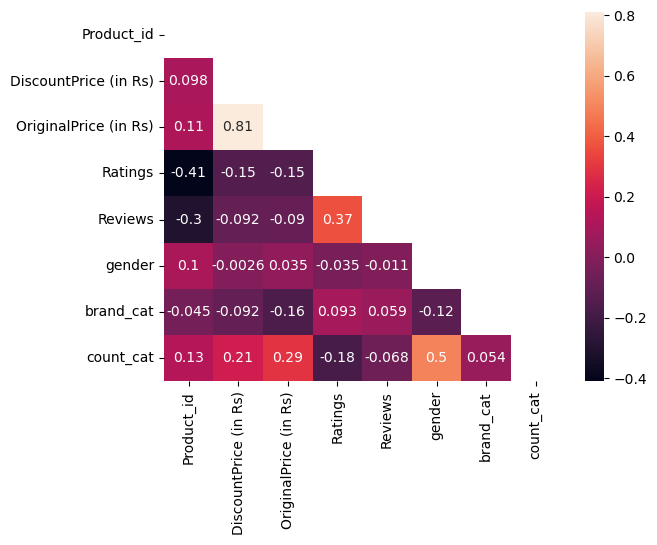

In [66]:
sns.heatmap(X_train.corr(), annot=True, mask = mask)

In [67]:
cut_mask = mask[1:,:-1]
cut_mask

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

In [68]:
cut_x_corr = x_corr.iloc[1:, :-1]
cut_x_corr

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews,gender,brand_cat
DiscountPrice (in Rs),0.097971,1.000000,0.812351,-0.145327,-0.092148,-0.002590,-0.092061
OriginalPrice (in Rs),0.110728,0.812351,1.000000,-0.151059,-0.090356,0.035198,-0.164889
Ratings,-0.410966,-0.145327,-0.151059,1.000000,0.366182,-0.034839,0.093316
Reviews,-0.301736,-0.092148,-0.090356,0.366182,1.000000,-0.010509,0.058581
gender,0.101394,-0.002590,0.035198,-0.034839,-0.010509,1.000000,-0.122930
brand_cat,-0.045109,-0.092061,-0.164889,0.093316,0.058581,-0.122930,1.000000
count_cat,0.130702,0.211178,0.288053,-0.179434,-0.067623,0.496826,0.054041


<Axes: >

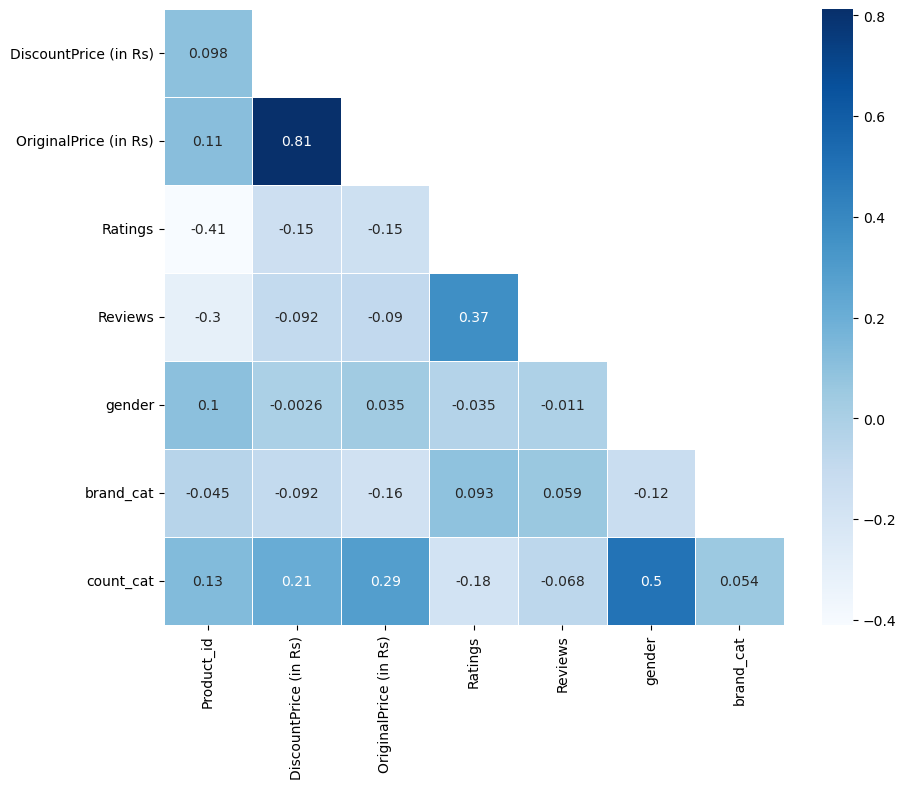

In [69]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data = cut_x_corr, annot=True, mask = cut_mask,cmap ='Blues', linewidth=0.5)

<Axes: >

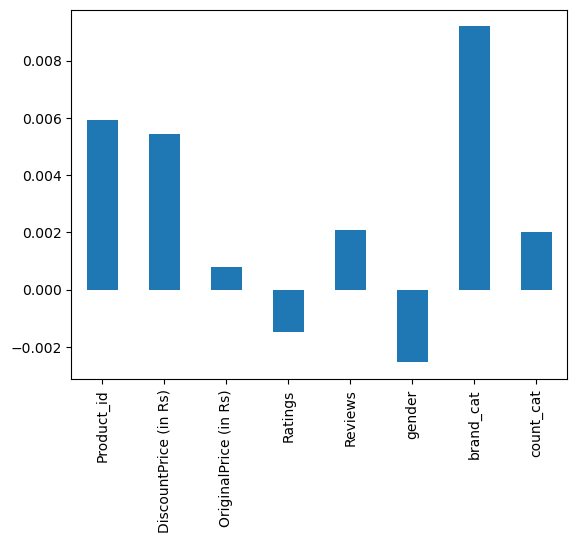

In [70]:
X_train.corrwith(y_train).plot(kind = 'bar')

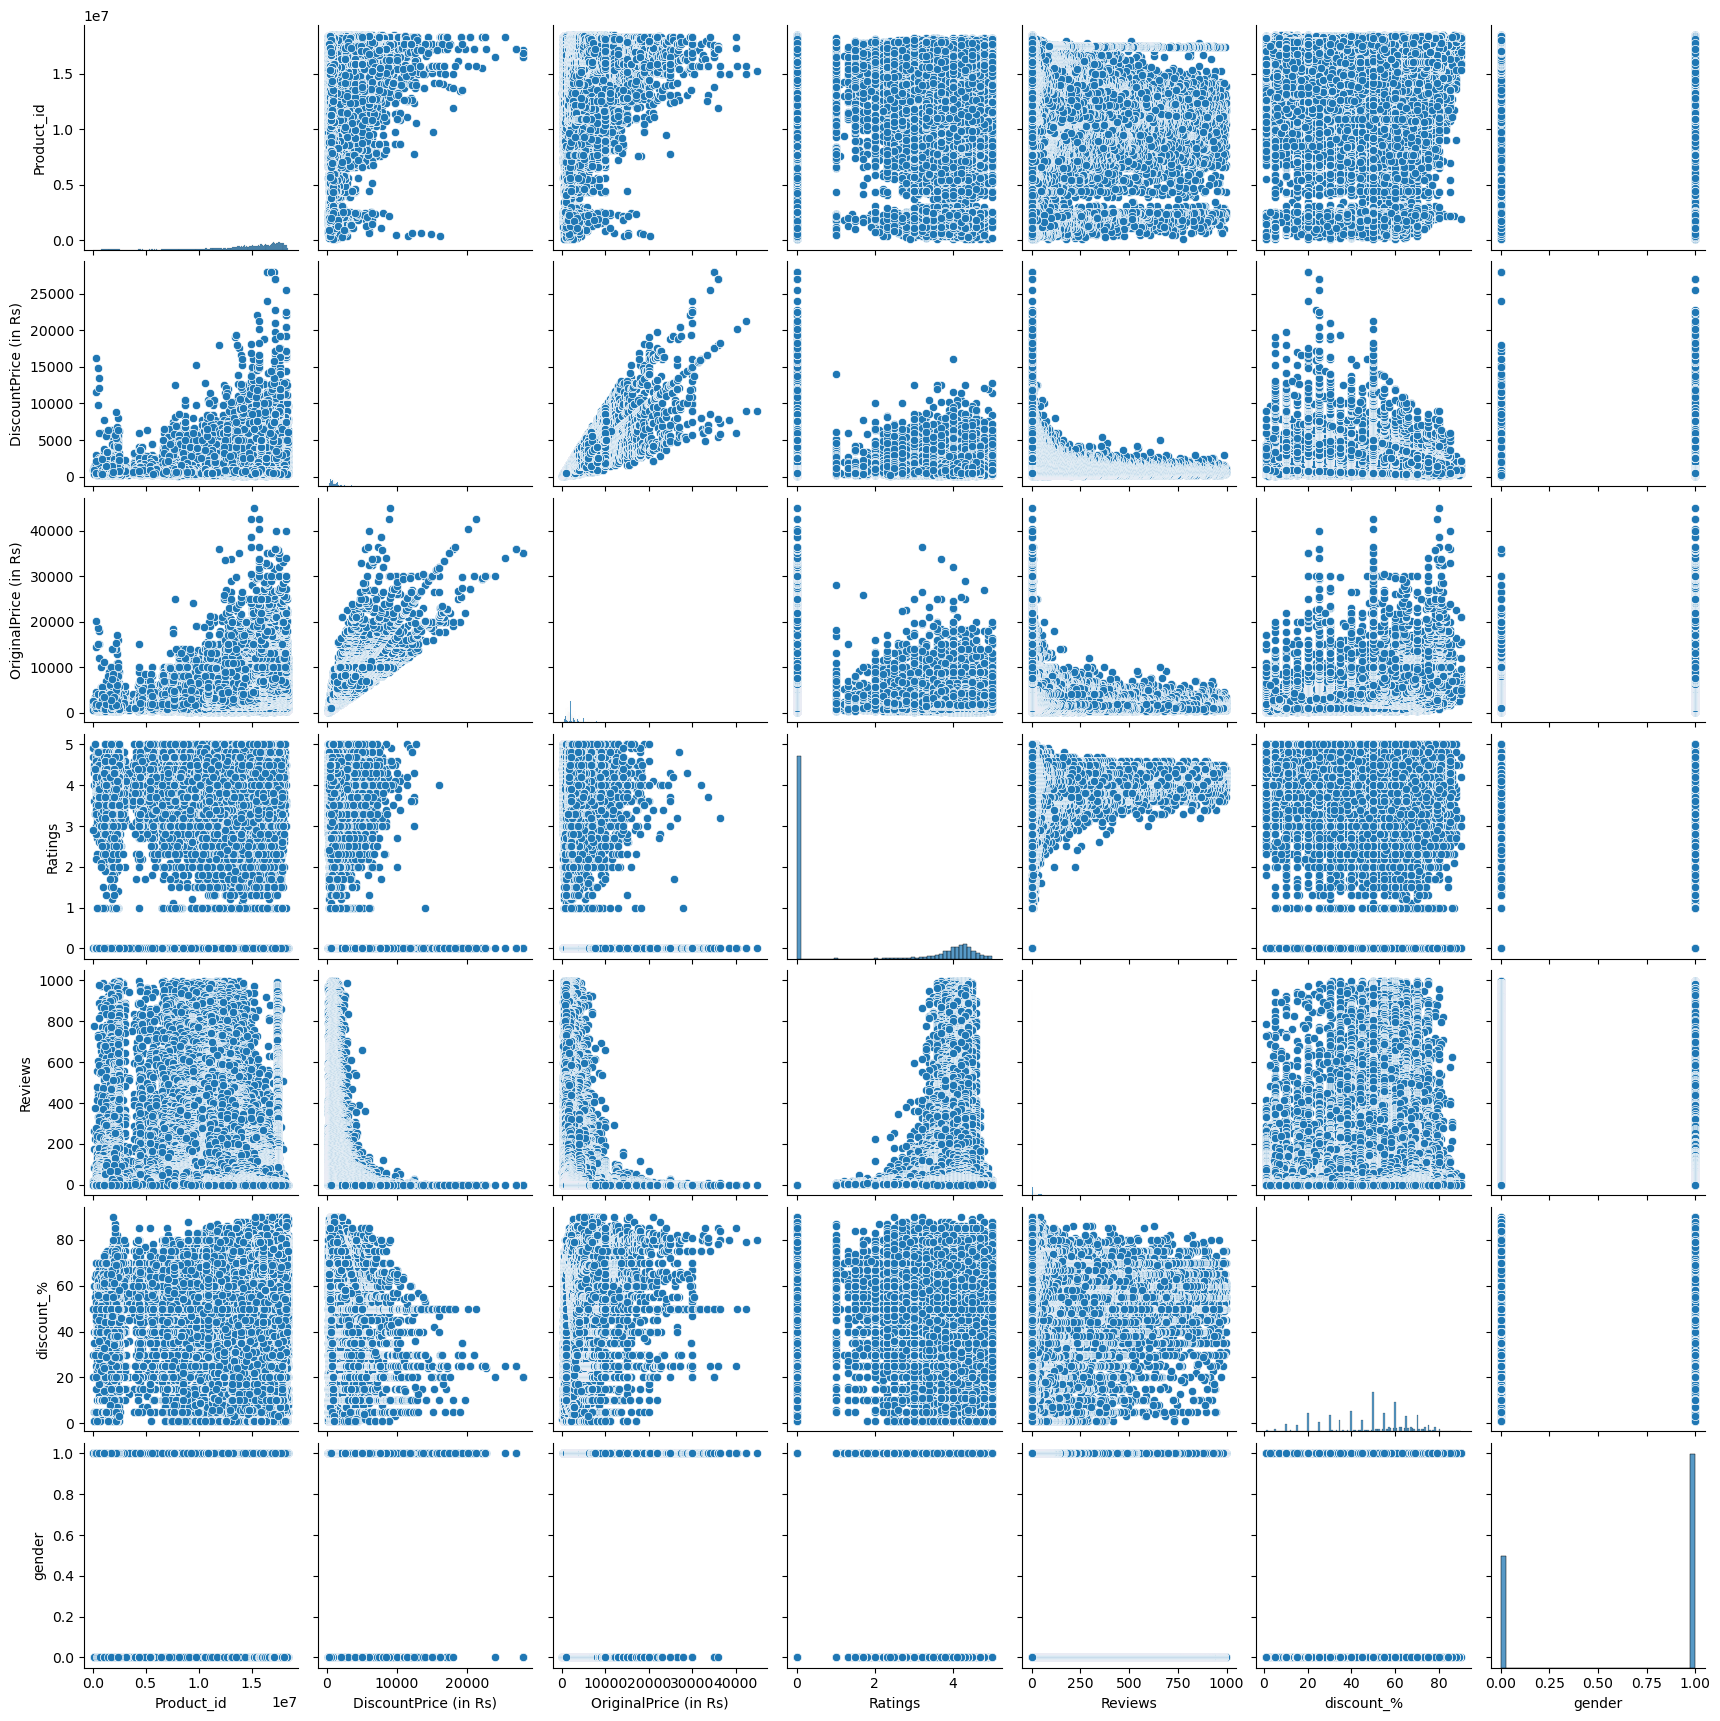

In [71]:
sns.pairplot(model_data)

Text(0, 0.5, 'Discount (%)')

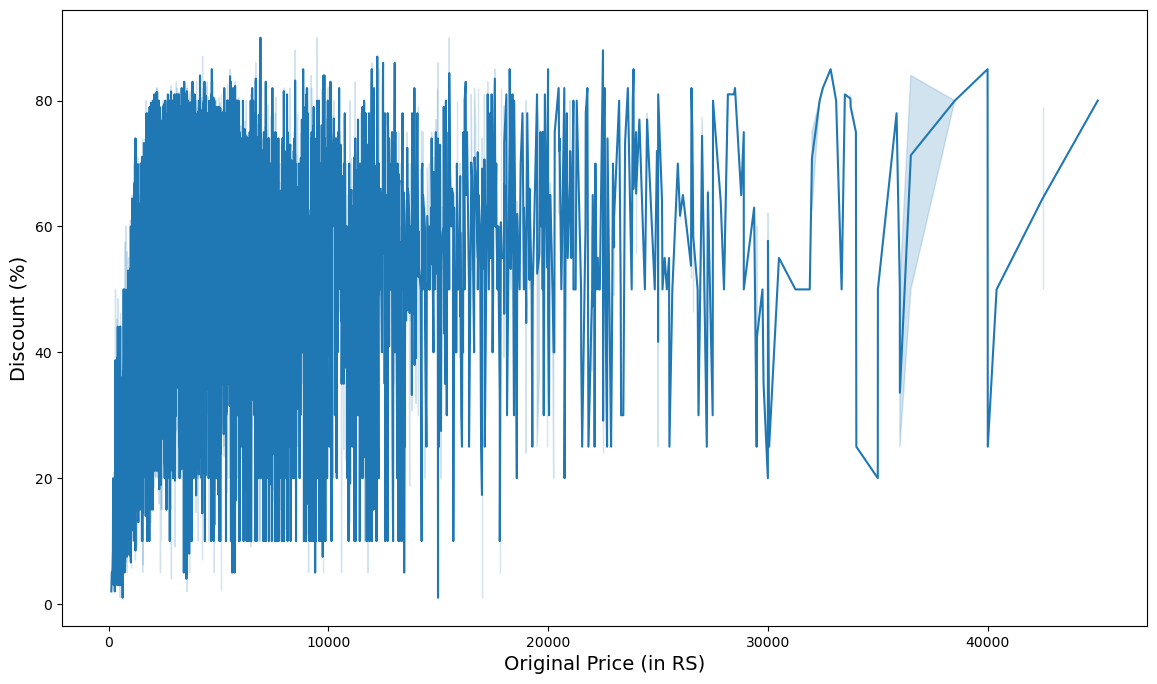

In [72]:
fig, ax = plt.subplots(figsize = (14, 8))

sns.lineplot(data = model_data, x=model_data['OriginalPrice (in Rs)'], y=model_data['discount_%'])

plt.xlabel('Original Price (in RS)', size = 14)
plt.ylabel('Discount (%)', size=14)

Text(0, 0.5, 'Discount (%)')

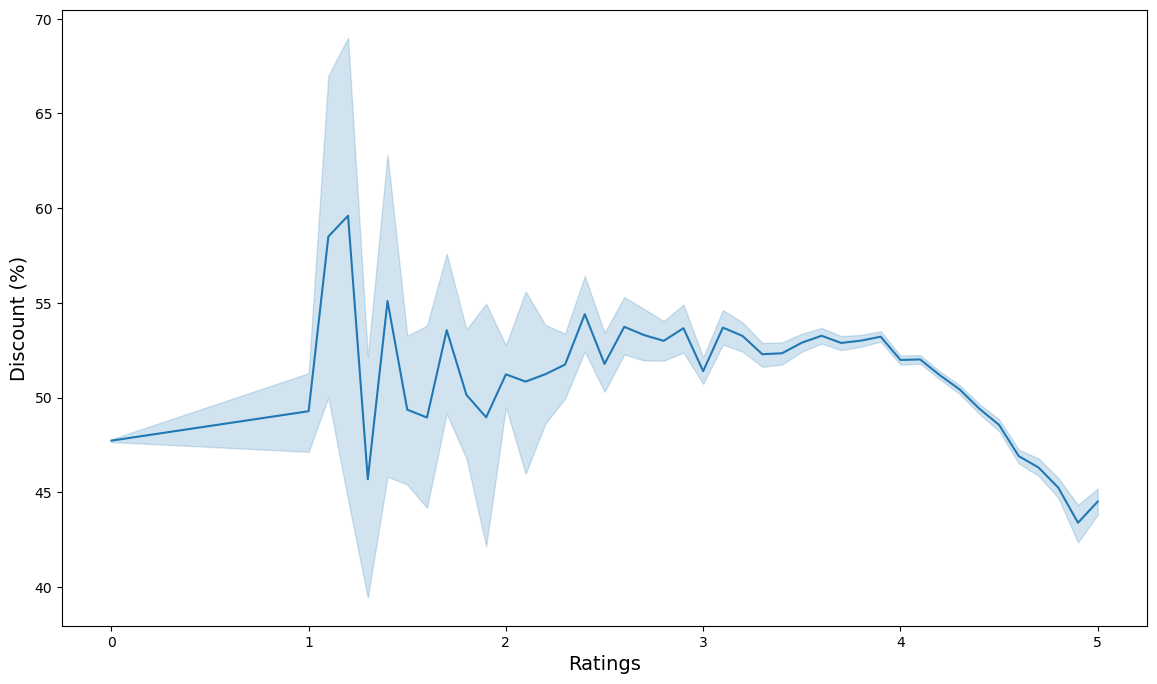

In [73]:
fig, ax = plt.subplots(figsize = (14, 8))

sns.lineplot(data = model_data, x=model_data['Ratings'], y=model_data['discount_%'])

plt.xlabel('Ratings', size = 14)
plt.ylabel('Discount (%)', size=14)

Text(0, 0.5, 'Discount (%)')

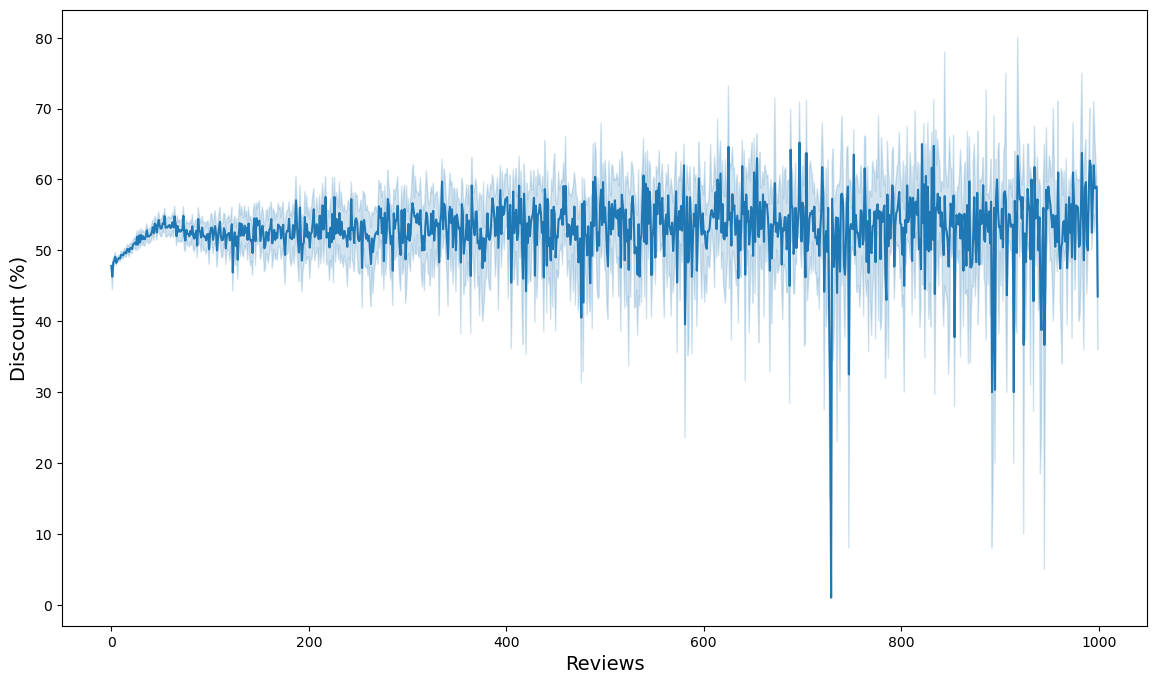

In [74]:
fig, ax = plt.subplots(figsize = (14, 8))

sns.lineplot(data = model_data, x=model_data['Reviews'], y=model_data['discount_%'])

plt.xlabel('Reviews', size = 14)
plt.ylabel('Discount (%)', size=14)

##### Chọn feature đưa vào model

In [75]:
model_features = ['OriginalPrice (in Rs)','Reviews' ,'Ratings' , 'count_cat','brand_cat', 'gender']
X_train = X_train[model_features]
X_test = X_test[model_features]
X_val = X_val[model_features]
data_no_discount = data_no_discount[model_features]

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_val = X_val.fillna(0)
data_no_discount = data_no_discount.fillna(0)

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [77]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.09461837633272963
model_validation_accuracy 0.09477696542033609


In [78]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [79]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.3978030045985136
model_validation_accuracy 0.3994467272539439


In [80]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [81]:
from sklearn.metrics import r2_score

y_test_predict = model.predict(X_test)
print('model_test_accuracy:',r2_score(y_test, y_test_predict))

y_val_predict = model.predict(X_val)
print('model_validation_accuracy',r2_score(y_val, y_val_predict))

model_test_accuracy: 0.4701348829507658
model_validation_accuracy 0.4728345496016755


#### So sánh dự đoán với kết quả test

In [82]:
test = pd.DataFrame()
test['actual'] = y_test
test['prediction'] = y_test_predict
test

,actual,prediction
7477,68.0,62.210000
3702,55.0,64.166667
467473,64.0,42.821962
122911,72.0,61.050000
265806,60.0,47.880052
...,...,...
286158,45.0,25.889186
448405,40.0,30.283907
116694,40.0,47.500000
280302,63.0,62.626356


##### So sánh dự đoán với kết quả xác thực

In [83]:
val = pd.DataFrame()
val['actual'] = y_val
val['prediction'] = y_val_predict
val

,actual,prediction
322320,20.0,20.000000
200059,30.0,32.090428
70888,45.0,46.725000
502298,25.0,25.746781
149460,20.0,45.560000
...,...,...
245099,10.0,13.024139
184366,25.0,34.250256
339778,74.0,73.850118
236018,60.0,60.000000


<Axes: xlabel='Feature'>

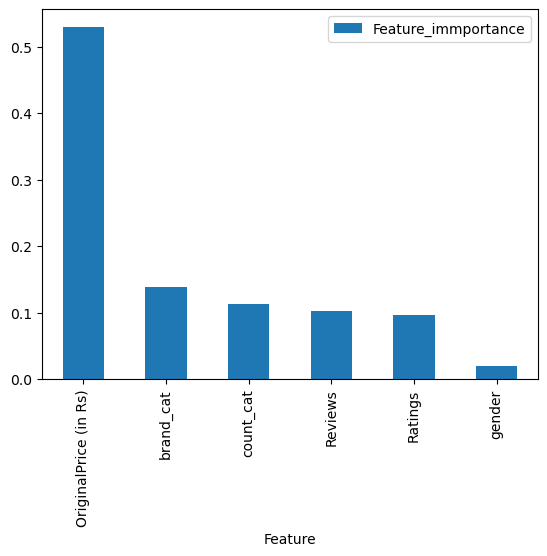

In [84]:
feature_importance = pd.DataFrame()
feature_importance['Feature'] = X_test.columns
feature_importance['Feature_immportance'] = model.feature_importances_
feature_importance = feature_importance.sort_values(by='Feature_immportance', ascending=False)
feature_importance.set_index('Feature').plot(kind = 'bar')

##### Áp dụng model vào dữ liệu không giảm giá

In [85]:
data_no_discount = data_no_discount[X_train.columns]
data_no_discount['discount_prediction'] = model.predict(data_no_discount)
data_no_discount

,OriginalPrice (in Rs),Reviews,Ratings,count_cat,brand_cat,gender,discount_prediction
0,600.0,8.0,3.5,20379,130.0,1,28.454212
1,2499.0,5.0,4.0,61243,434.0,1,67.575833
2,2499.0,0.0,0.0,61243,434.0,1,70.298822
3,2499.0,0.0,0.0,61243,434.0,1,70.298822
4,2499.0,0.0,0.0,61243,434.0,1,70.298822
...,...,...,...,...,...,...,...
74126,9999.0,0.0,0.0,53414,173.0,1,26.651127
74127,9999.0,0.0,0.0,53414,361.0,1,45.990476
74128,9999.0,0.0,0.0,53414,589.0,1,50.607048
74129,9999.0,0.0,0.0,53414,589.0,1,50.607048


Text(0, 0.5, 'Density')

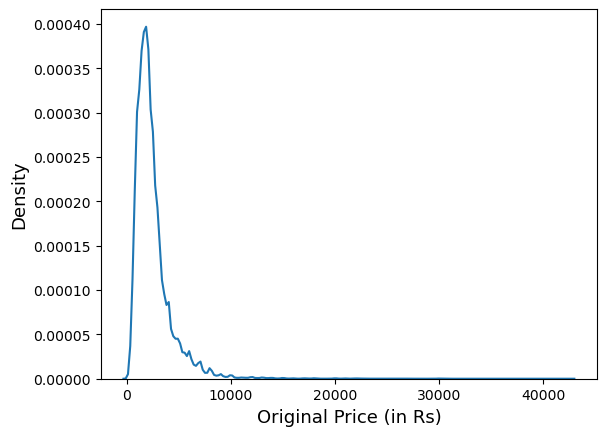

In [86]:
sns.kdeplot(data=X_train, x="OriginalPrice (in Rs)")

plt.xlabel("Original Price (in Rs)",size = 13)
plt.ylabel("Density",size = 13)

Text(0, 0.5, 'Density')

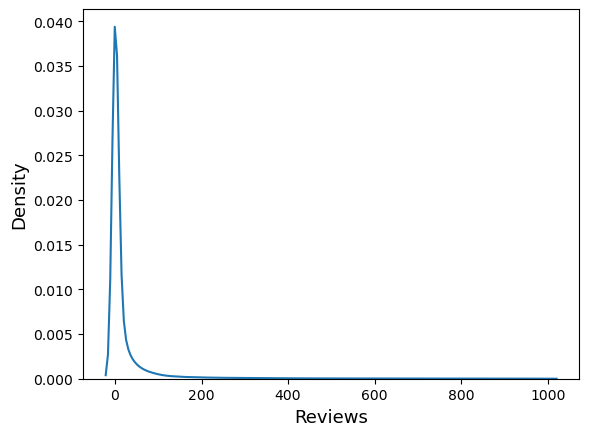

In [87]:
sns.kdeplot(data=X_train, x="Reviews")

plt.xlabel("Reviews",size = 13)
plt.ylabel("Density",size = 13)

Text(0, 0.5, 'Density')

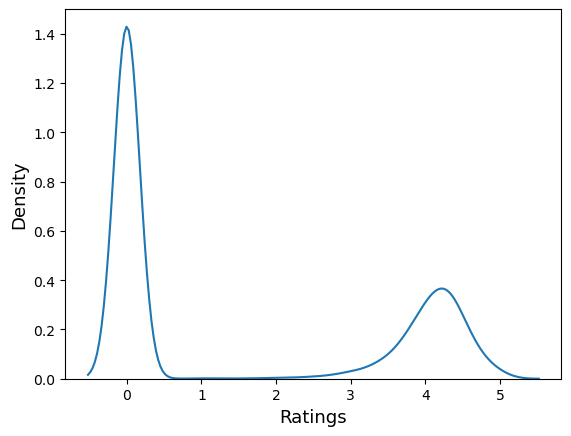

In [88]:
sns.kdeplot(data=X_train, x="Ratings")

plt.xlabel("Ratings",size = 13)
plt.ylabel("Density",size = 13)

Text(0, 0.5, 'Density')

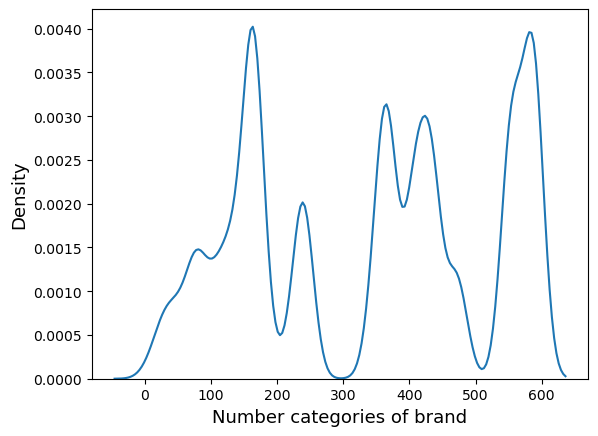

In [89]:
sns.kdeplot(data=X_train, x="brand_cat")

plt.xlabel("Number categories of brand",size = 13)
plt.ylabel("Density",size = 13)

Text(0, 0.5, 'Density')

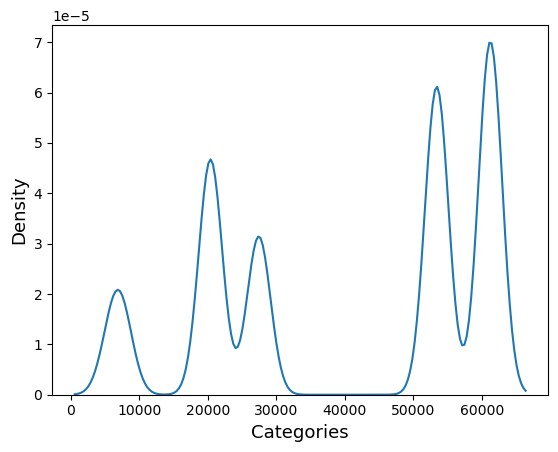

In [90]:
sns.kdeplot(data=X_train, x="count_cat")

plt.xlabel("Categories",size = 13)
plt.ylabel("Density",size = 13)